<a href="https://colab.research.google.com/github/edreyesc/ProyectoFinal/blob/main/proyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet

## **Proyecto Final - Modelos Predictivos**

In [1]:
#Carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error


2. Carga de Datos

In [2]:
#Adquisición de datos
df_original = pd.read_csv('https://raw.githubusercontent.com/edreyesc/ProyectoFinal/main/Gold%20Historical%20Data.csv')
gold_price_df = pd.read_csv('https://raw.githubusercontent.com/edreyesc/ProyectoFinal/main/Gold%20Historical%20Data.csv',
                            parse_dates=['Date'],index_col='Date', usecols=['Date', 'Price'])

#Transformación de columna numérica a float y eliminar la coma que venía del csv
gold_price_df['Price'] = gold_price_df['Price'].replace({',':''}, regex=True).astype(float)

#Impresión del dataset
gold_price_df

,Price
Date,
2024-12-31,2641.0
2024-12-30,2618.1
2024-12-27,2618.4
2024-12-26,2640.3
2024-12-24,2622.8
...,...
2014-01-08,1225.5
2014-01-07,1229.6
2014-01-06,1238.0


In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2816 entries, 0 to 2815
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2816 non-null   object
 1   Price     2816 non-null   object
 2   Open      2816 non-null   object
 3   High      2816 non-null   object
 4   Low       2816 non-null   object
 5   Vol.      2814 non-null   object
 6   Change %  2816 non-null   object
dtypes: object(7)
memory usage: 154.1+ KB


In [4]:
gold_price_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2816 entries, 2024-12-31 to 2014-01-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2816 non-null   float64
dtypes: float64(1)
memory usage: 44.0 KB


In [5]:
gold_price_df.shape

(2816, 1)

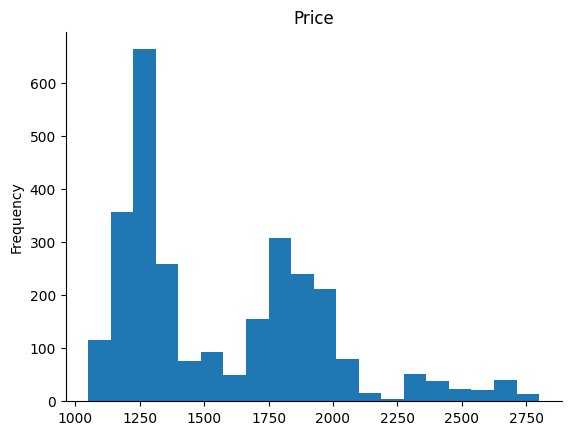

In [ ]:
# @title Price

from matplotlib import pyplot as plt
gold_price_df['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

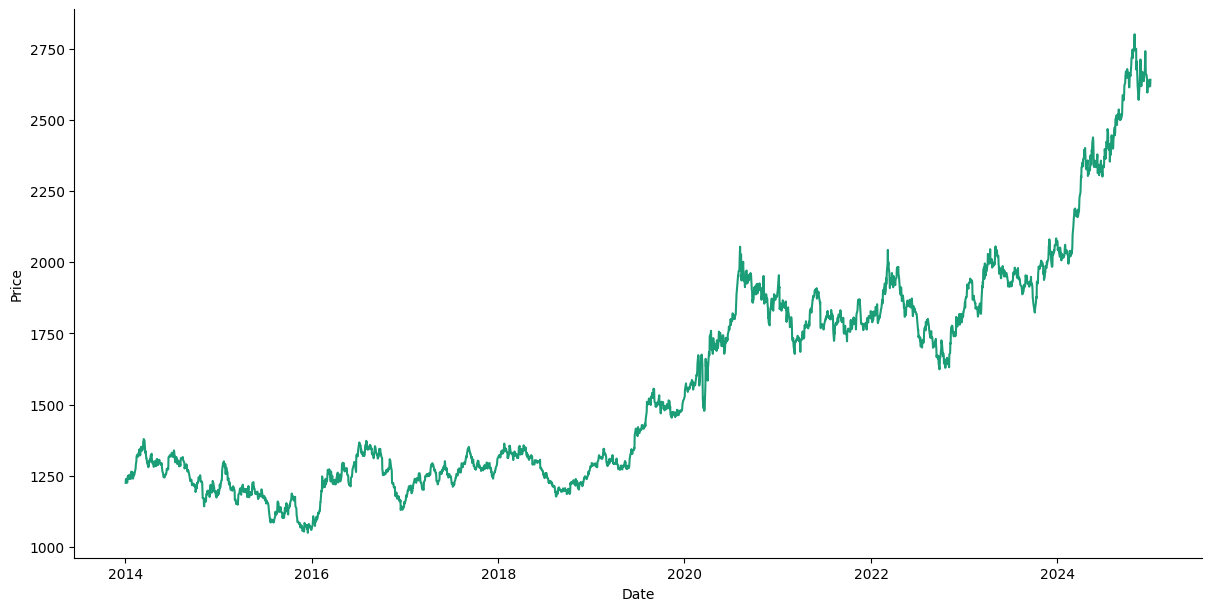

In [6]:
# @title Date vs Price

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series.index
  ys = series['Price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(12, 6), layout='constrained')
df_sorted = gold_price_df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Price')

Descripción del dataset

In [7]:
gold_price_df.describe()

,Price
count,2816.000000
mean,1576.401669
std,387.842859
min,1049.600000
25%,1256.750000
50%,1417.550000
75%,1850.275000
max,2800.800000


Valores nulos

In [8]:
gold_price_df.isnull().sum()

,0
Price,0


Descripción de variables

In [9]:
gold_price_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2816 entries, 2024-12-31 to 2014-01-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2816 non-null   float64
dtypes: float64(1)
memory usage: 44.0 KB


# **Aplicación del modelo Winters**

In [10]:
modelo_winters = ExponentialSmoothing(
    df_sorted['Price'],
    trend='add',
    seasonal='mul',
    seasonal_periods=260
).fit()

modelo_winters.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Price,No. Observations:,2816
Model:,ExponentialSmoothing,SSE,646086.181
Optimized:,True,AIC,15834.693
Trend:,Additive,BIC,17403.664
Seasonal:,Multiplicative,AICC,15890.419
Seasonal Periods:,260,Date:,"Sun, 06 Apr 2025"
Box-Cox:,False,Time:,13:34:16
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9242807,alpha,True
smoothing_trend,0.0001043,beta,True


# **Evaluación de la calidad del ajuste**

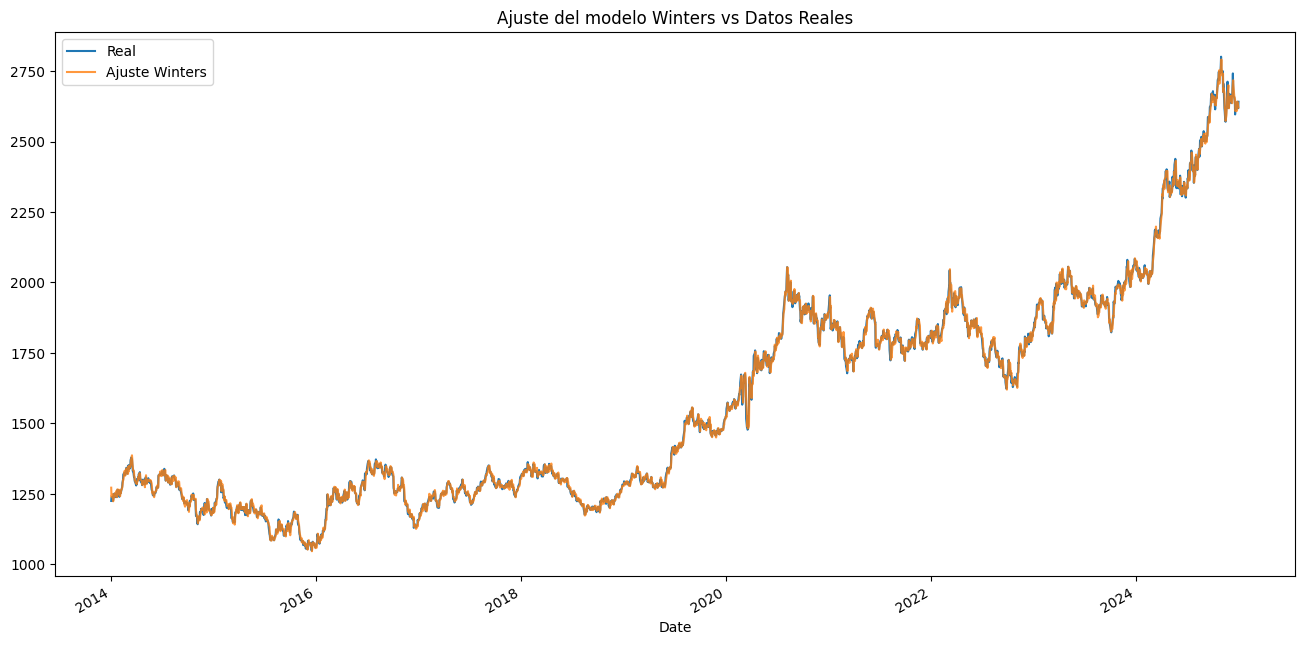

In [11]:
# Gráfica del ajuste sobre datos reales
#df_sorted = gold_price_df.sort_values('Date', ascending=True)
plt.figure(figsize=(16,8))
df_sorted['Price'].plot(label='Real')
modelo_winters.fittedvalues.plot(label='Ajuste Winters', alpha=0.8)
plt.legend()
plt.title('Ajuste del modelo Winters vs Datos Reales')
plt.show()

Fechas futuras

In [12]:
ultima_fecha = df_sorted.index[-1]
fechas_futuras = pd.bdate_range(start=ultima_fecha + pd.Timedelta(days=1), periods=60)
print(fechas_futuras)

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-06',
               '2025-01-07', '2025-01-08', '2025-01-09', '2025-01-10',
               '2025-01-13', '2025-01-14', '2025-01-15', '2025-01-16',
               '2025-01-17', '2025-01-20', '2025-01-21', '2025-01-22',
               '2025-01-23', '2025-01-24', '2025-01-27', '2025-01-28',
               '2025-01-29', '2025-01-30', '2025-01-31', '2025-02-03',
               '2025-02-04', '2025-02-05', '2025-02-06', '2025-02-07',
               '2025-02-10', '2025-02-11', '2025-02-12', '2025-02-13',
               '2025-02-14', '2025-02-17', '2025-02-18', '2025-02-19',
               '2025-02-20', '2025-02-21', '2025-02-24', '2025-02-25',
               '2025-02-26', '2025-02-27', '2025-02-28', '2025-03-03',
               '2025-03-04', '2025-03-05', '2025-03-06', '2025-03-07',
               '2025-03-10', '2025-03-11', '2025-03-12', '2025-03-13',
               '2025-03-14', '2025-03-17', '2025-03-18', '2025-03-19',
      

# **Visualización de predicciones**

In [13]:
valores_prediccion = modelo_winters.forecast(60)
prediccion = pd.Series(valores_prediccion.values, index=fechas_futuras)
print(prediccion)

2025-01-01    2645.116001
2025-01-02    2647.902794
2025-01-03    2645.389868
2025-01-06    2642.164046
2025-01-07    2642.764349
2025-01-08    2645.078951
2025-01-09    2656.762364
2025-01-10    2653.593369
2025-01-13    2649.369489
2025-01-14    2657.028346
2025-01-15    2667.365805
2025-01-16    2668.339920
2025-01-17    2657.456190
2025-01-20    2657.658812
2025-01-21    2654.538272
2025-01-22    2652.203722
2025-01-23    2647.454758
2025-01-24    2647.908258
2025-01-27    2645.804163
2025-01-28    2633.967532
2025-01-29    2648.408944
2025-01-30    2648.868885
2025-01-31    2654.639725
2025-02-03    2657.031875
2025-02-04    2656.897530
2025-02-05    2644.638726
2025-02-06    2633.066833
2025-02-07    2626.035450
2025-02-10    2626.466159
2025-02-11    2612.933142
2025-02-12    2618.879292
2025-02-13    2613.205808
2025-02-14    2613.519879
2025-02-17    2594.352966
2025-02-18    2592.496372
2025-02-19    2594.667002
2025-02-20    2592.507789
2025-02-21    2596.826346
2025-02-24  

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


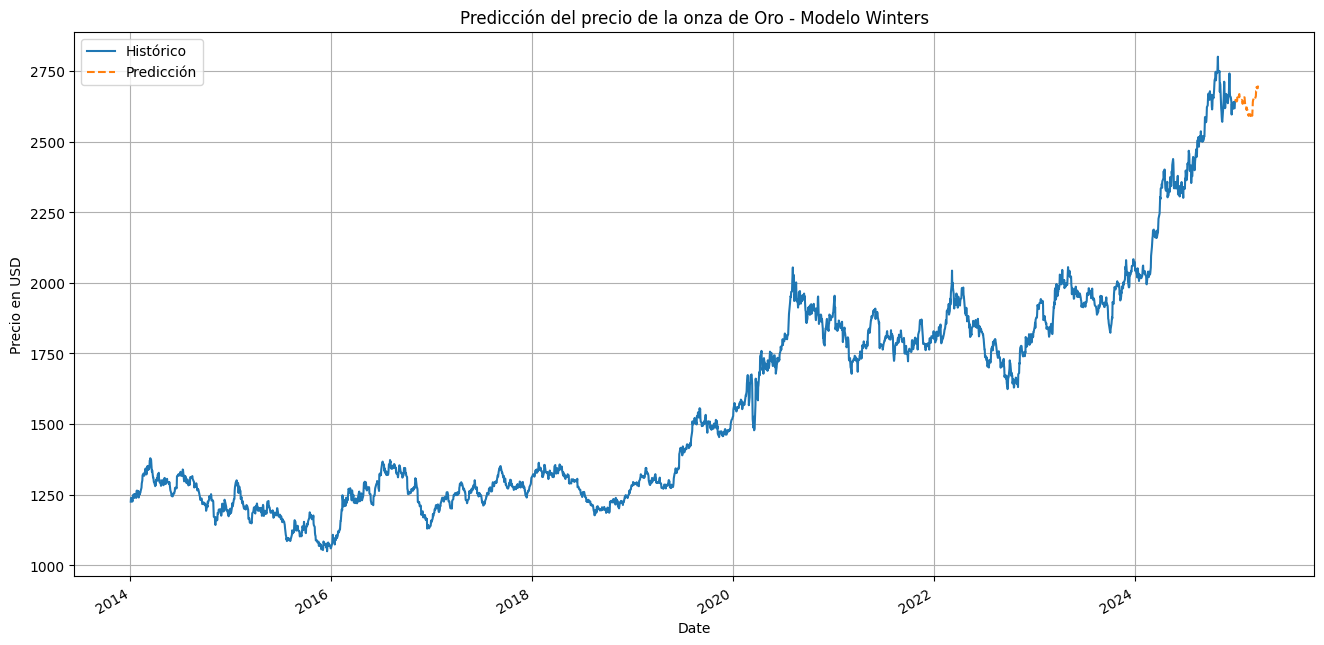

In [14]:
# Gráfica de predicción futura
plt.figure(figsize=(16,8))
gold_price_df['Price'].plot(label='Histórico')
prediccion.plot(label='Predicción', linestyle='--')
plt.legend()
plt.title('Predicción del precio de la onza de Oro - Modelo Winters')
#plt.xlabel('Date')
plt.ylabel('Precio en USD')
plt.grid(True)
plt.show()

# **Métricas de error**

In [15]:
ajuste = modelo_winters.fittedvalues
real = df_sorted['Price']

# MSE
mse_winters = mean_squared_error(real, ajuste)
print(f"MSE:  {mse_winters:.2f}")

# MAD
mad_winters = mean_absolute_error(real, ajuste)
print(f"MAD:  {mad_winters:.2f}")

# MAPE
mape_winters = np.mean(np.abs((real - ajuste) / real)) * 100
print(f"MAPE: {mape_winters:.2f}%")

# Desviación estándar
desv_est_winters = mad_winters * 1.25
print(f"Desviación estandar: {desv_est_winters:.2f}")

MSE:  229.43
MAD:  10.82
MAPE: 0.68%
Desviación estandar: 13.53


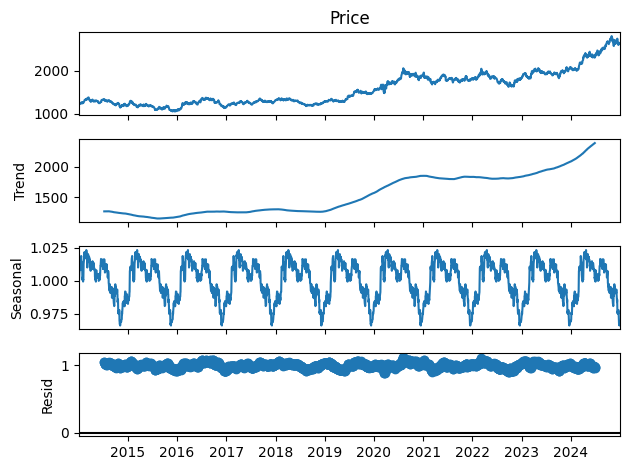

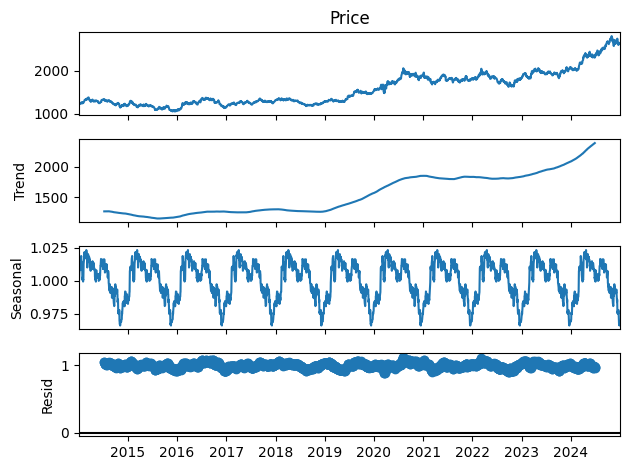

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposicion = seasonal_decompose(df_sorted['Price'], model='multiplicative', period=260)
decomposicion.plot()

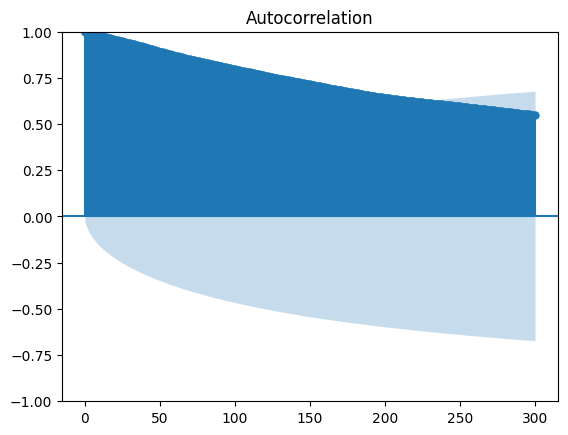

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_sorted['Price'], lags=300)
plt.show()


<Axes: title={'center': 'Serie diferenciada (d=1)'}, xlabel='Date'>

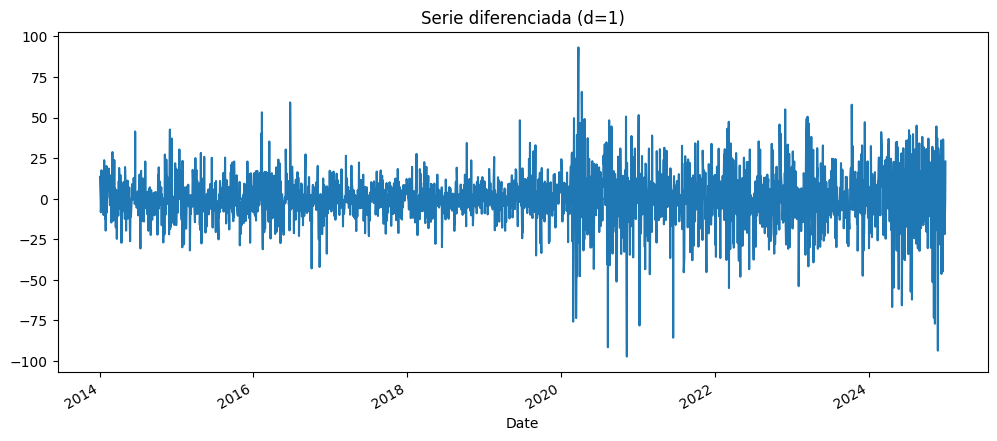

In [18]:
# Diferenciación de primer orden
df_diff = df_sorted['Price'].diff().dropna()

# Ver rápida de la serie diferenciada
df_diff.plot(figsize=(12,5), title='Serie diferenciada (d=1)')


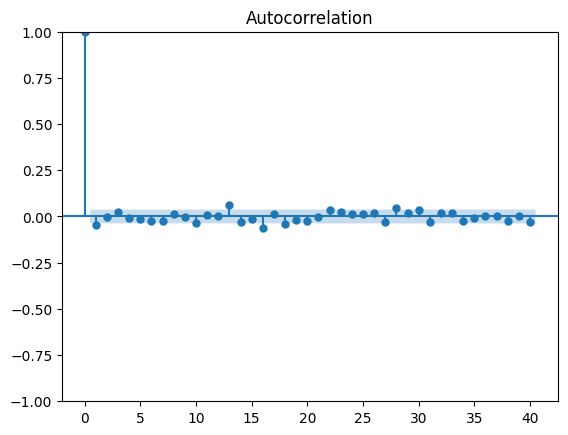

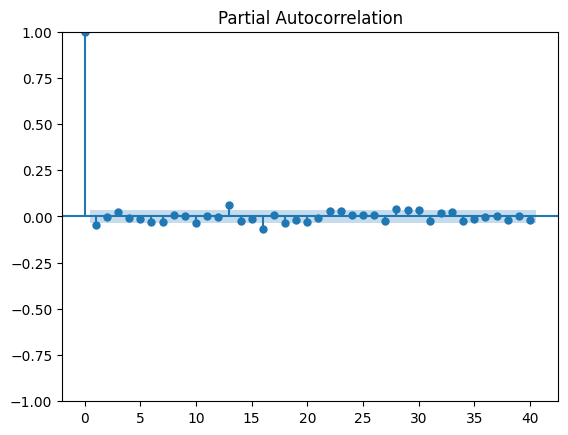

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_diff, lags=40)
plt.show()

plot_pacf(df_diff, lags=40)
plt.show()

# **Aplicación del modelo ARIMA**

In [20]:
#--- Modelo 1: ARIMA(0,1,0)
modelo_arima = ARIMA(df_sorted['Price'], order=(2,1,2)).fit()
modelo_arima.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 2816
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -11670.016
Date:                Sun, 06 Apr 2025   AIC                          23350.033
Time:                        13:43:51   BIC                          23379.746
Sample:                             0   HQIC                         23360.755
                               - 2816                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4943      0.008     64.487      0.000       0.479       0.509
ar.L2         -0.9811      0.008   -130.718      0.000      -0.996      -0.966
ma.L1         -0.5127      0.007    -69.966      0.000      -0.527      -0.498
ma.L2          0.9857      0.007    138.697      0.000       0.972       1.000
sigma2       233.3558      3.426     68.120      0.000     226.642     240.070
===================================================================================
Ljung-Box (L1) (Q):                   2.58   Jarque-Bera (JB):              2857.23
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               2.89   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
# Valores ajustados
fitted = modelo_arima.predict(start = 1, end = len(df_sorted) - 1, type='leve')

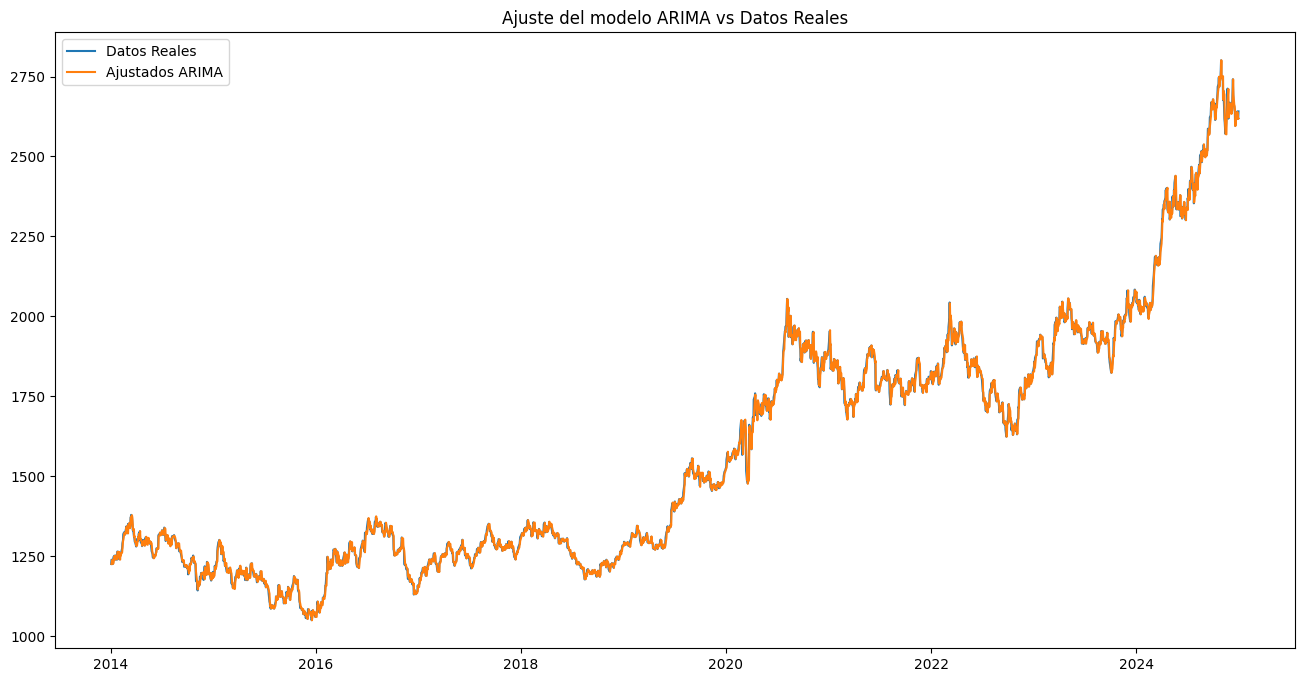

In [23]:
# Gráfica del ajuste sobre datos reales
plt.figure(figsize=(16,8))
plt.plot(df_sorted.index, df_sorted['Price'], label="Datos Reales")
#df_sorted['Price']['2014-01'].plot(label='Real')
plt.plot(fitted.index, fitted, label="Ajustados ARIMA")
#modelo_arima.fittedvalues.plot(label='Ajuste ARIMA', alpha=0.8)
plt.legend()
plt.title('Ajuste del modelo ARIMA vs Datos Reales')
plt.show()

In [24]:
# Pronosticar valores futuros
valores_prediccion_arima = modelo_arima.get_forecast(60).predicted_mean
prediccion_arima = pd.Series(valores_prediccion_arima.values, index=fechas_futuras)
print(prediccion_arima)

2025-01-01    2641.578917
2025-01-02    2641.507952
2025-01-03    2640.904900
2025-01-06    2640.676428
2025-01-07    2641.155146
2025-01-08    2641.615934
2025-01-09    2641.374037
2025-01-10    2640.802387
2025-01-13    2640.757140
2025-01-14    2641.295618
2025-01-15    2641.606184
2025-01-16    2641.231401
2025-01-17    2640.741446
2025-01-20    2640.866955
2025-01-21    2641.409690
2025-01-22    2641.554832
2025-01-23    2641.094101
2025-01-24    2640.723959
2025-01-27    2640.993016
2025-01-28    2641.489159
2025-01-29    2641.470436
2025-01-30    2640.974416
2025-01-31    2640.747598
2025-02-03    2641.122124
2025-02-04    2641.529786
2025-02-05    2641.363851
2025-02-06    2640.881871
2025-02-07    2640.806422
2025-02-10    2641.241996
2025-02-11    2641.531328
2025-02-12    2641.247006
2025-02-13    2640.822601
2025-02-14    2640.891761
2025-02-17    2641.342330
2025-02-18    2641.497198
2025-02-19    2641.131699
2025-02-20    2640.799088
2025-02-21    2640.993266
2025-02-24  

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


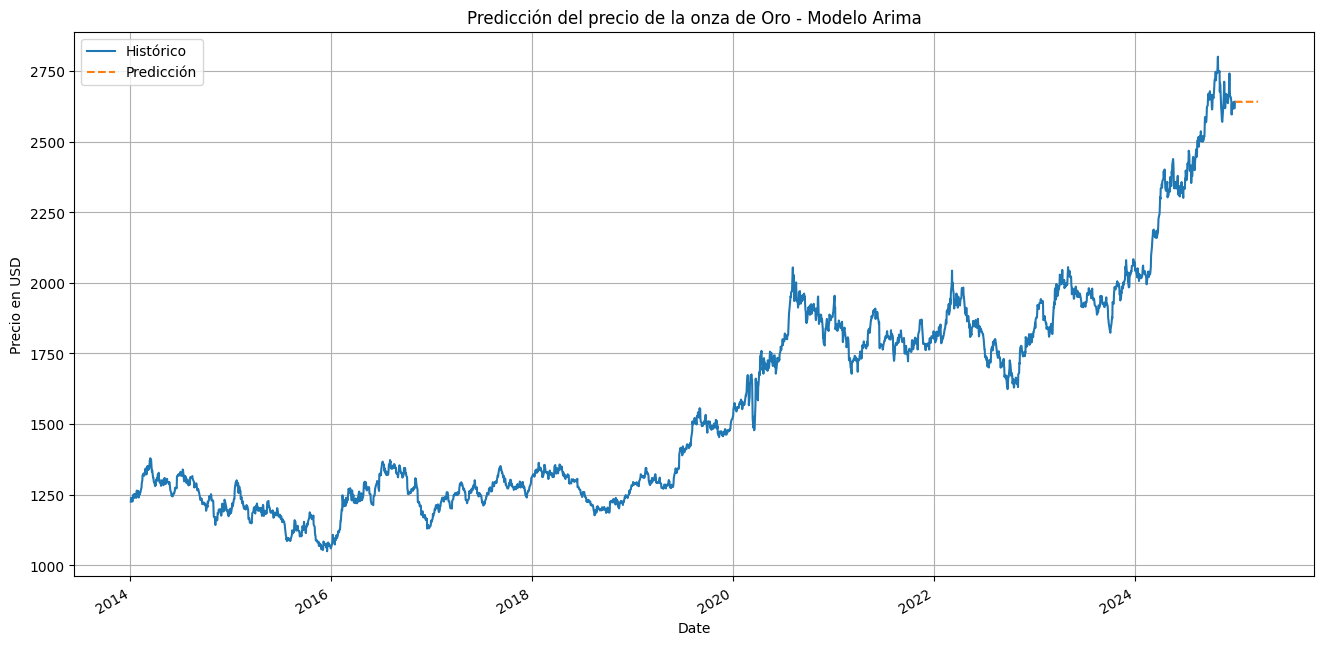

In [25]:
# Gráfica de predicción futura
plt.figure(figsize=(16,8))
gold_price_df['Price'].plot(label='Histórico')
prediccion_arima.plot(label='Predicción', linestyle='--')
plt.legend()
plt.title('Predicción del precio de la onza de Oro - Modelo Arima')
plt.xlabel('Date')
plt.ylabel('Precio en USD')
plt.grid(True)
plt.show()

# **Métricas de error**

In [26]:
ajuste = modelo_arima.fittedvalues
real = df_sorted['Price']

# MSE
mse_arima = mean_squared_error(real, ajuste)
print(f"MSE:  {mse_arima:.2f}")

# MAD
mad_arima = mean_absolute_error(real, ajuste)
print(f"MAD:  {mad_arima:.2f}")

# MAPE
mape_arima = np.mean(np.abs((real - ajuste) / real)) * 100
print(f"MAPE: {mape_arima:.2f}%")

# Desviación estándar
desv_est_arima = mad_arima * 1.25
print(f"Desviación estandar: {desv_est_arima:.2f}")

MSE:  766.52
MAD:  10.93
MAPE: 0.69%
Desviación estandar: 13.66


# **Aplicación del Modelo Sarima**

In [27]:
modelo_sarima = SARIMAX(df_sorted['Price'],
                        order=(1,1,1),
                        seasonal_order=(1,0,1,5),
                        enforce_stationarity=False,
                        enforce_invertibility=False).fit()

modelo_sarima.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Price   No. Observations:                 2816
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 5)   Log Likelihood              -11649.294
Date:                           Sun, 06 Apr 2025   AIC                          23308.588
Time:                                   13:44:20   BIC                          23338.289
Sample:                                        0   HQIC                         23319.308
                                          - 2816                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0653      0.293     -0.223      0.824      -0.639       0.509
ma.L1          0.0176      0.292      0.060      0.952      -0.554       0.589
ar.S.L5        0.5311      0.273      1.947      0.052      -0.004       1.066
ma.S.L5       -0.5607      0.267     -2.099      0.036      -1.084      -0.037
sigma2       234.8389      3.402     69.038      0.000     228.172     241.506
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2885.86
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               2.91   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
# Pronosticar valores futuros
resultado_sarima = modelo_sarima.get_forecast(steps=60).predicted_mean
prediccion_sarima = pd.Series(resultado_sarima.values, index=fechas_futuras)
print(prediccion_sarima)




2025-01-01    2639.757281
2025-01-02    2639.038909
2025-01-03    2640.933401
2025-01-06    2640.502564
2025-01-07    2640.028195
2025-01-08    2639.969649
2025-01-09    2639.548902
2025-01-10    2640.557562
2025-01-13    2640.328592
2025-01-14    2640.076682
2025-01-15    2640.045590
2025-01-16    2639.822145
2025-01-17    2640.357810
2025-01-20    2640.236212
2025-01-21    2640.102431
2025-01-22    2640.085919
2025-01-23    2639.967256
2025-01-24    2640.251728
2025-01-27    2640.187152
2025-01-28    2640.116105
2025-01-29    2640.107337
2025-01-30    2640.044319
2025-01-31    2640.195392
2025-02-03    2640.161098
2025-02-04    2640.123368
2025-02-05    2640.118711
2025-02-06    2640.085244
2025-02-07    2640.165474
2025-02-10    2640.147261
2025-02-11    2640.127224
2025-02-12    2640.124751
2025-02-13    2640.106978
2025-02-14    2640.149585
2025-02-17    2640.139913
2025-02-18    2640.129272
2025-02-19    2640.127959
2025-02-20    2640.118520
2025-02-21    2640.141148
2025-02-24  

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


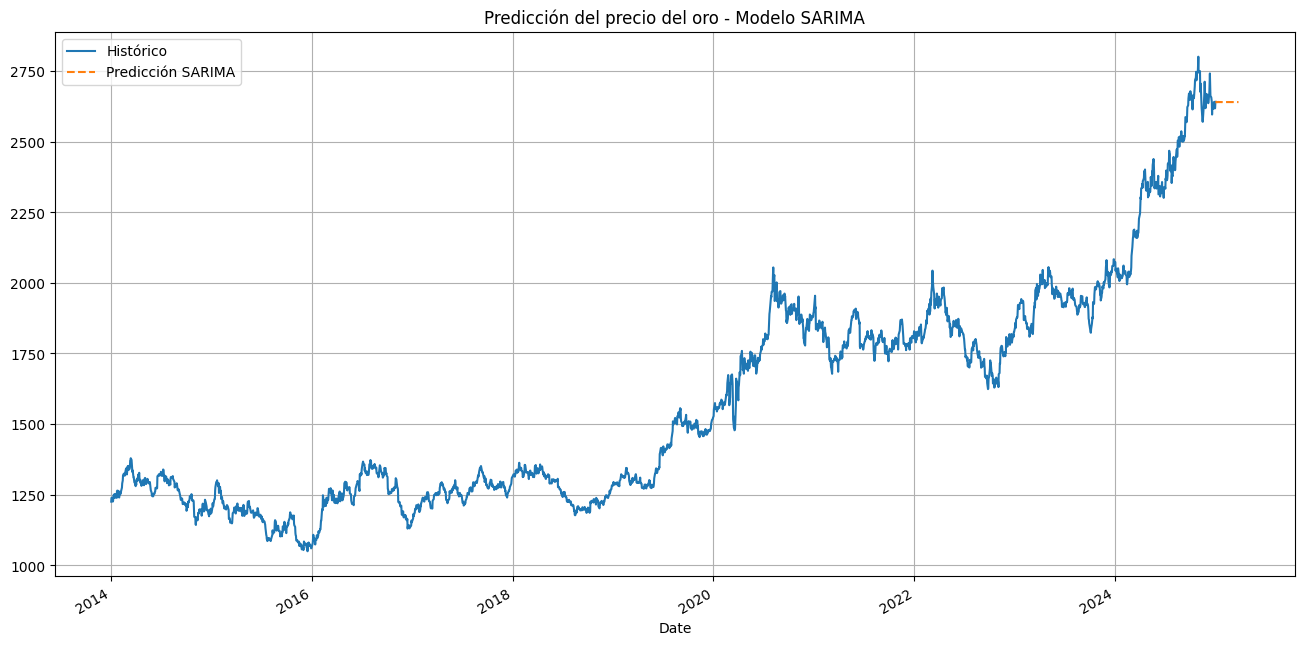

In [29]:
plt.figure(figsize=(16,8))
df_sorted['Price'].plot(label='Histórico')
prediccion_sarima.plot(label='Predicción SARIMA', linestyle='--')
plt.legend()
plt.title('Predicción del precio del oro - Modelo SARIMA')
plt.grid(True)
plt.show()

# Métricas de **error**

In [30]:
ajuste = modelo_sarima.fittedvalues
real = df_sorted['Price']

# MSE
mse_sarima = mean_squared_error(real, ajuste)
print(f"MSE:  {mse_sarima:.2f}")

# MAD
mad_sarima = mean_absolute_error(real, ajuste)
print(f"MAD:  {mad_sarima:.2f}")

# MAPE
mape_sarima = np.mean(np.abs((real - ajuste) / real)) * 100
print(f"MAPE: {mape_sarima:.2f}%")

# Desviación estándar
desv_est_sarima = mad_sarima * 1.25
print(f"Desviación estandar: {desv_est_sarima:.2f}")

MSE:  804.85
MAD:  11.05
MAPE: 0.70%
Desviación estandar: 13.82


# **Prophet**

In [31]:
# Formatear datos
df_prophet = df_sorted[['Price']].reset_index()
df_prophet.columns = ['ds', 'y']

In [32]:
# Crear y entrenar el modelo
modelo_prophet = Prophet(daily_seasonality=True)
modelo_prophet.fit(df_prophet)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp33e0rdmw/vbdmru6m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp33e0rdmw/tbq8fyuw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85269', 'data', 'file=/tmp/tmp33e0rdmw/vbdmru6m.json', 'init=/tmp/tmp33e0rdmw/tbq8fyuw.json', 'output', 'file=/tmp/tmp33e0rdmw/prophet_modelmhdrt879/prophet_model-20250406134843.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:48:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:48:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [33]:
# Fechas futuras y predicción
futuro = modelo_prophet.make_future_dataframe(periods=60, freq='B')
pronostico_prophet = modelo_prophet.predict(futuro)

'\nfrom prophet.plot import plot_plotly\nimport plotly.offline as py\npy.init_notebook_mode(connected=True)\n\nplot_plotly(modelo_prophet, pronostico_prophet)\n'

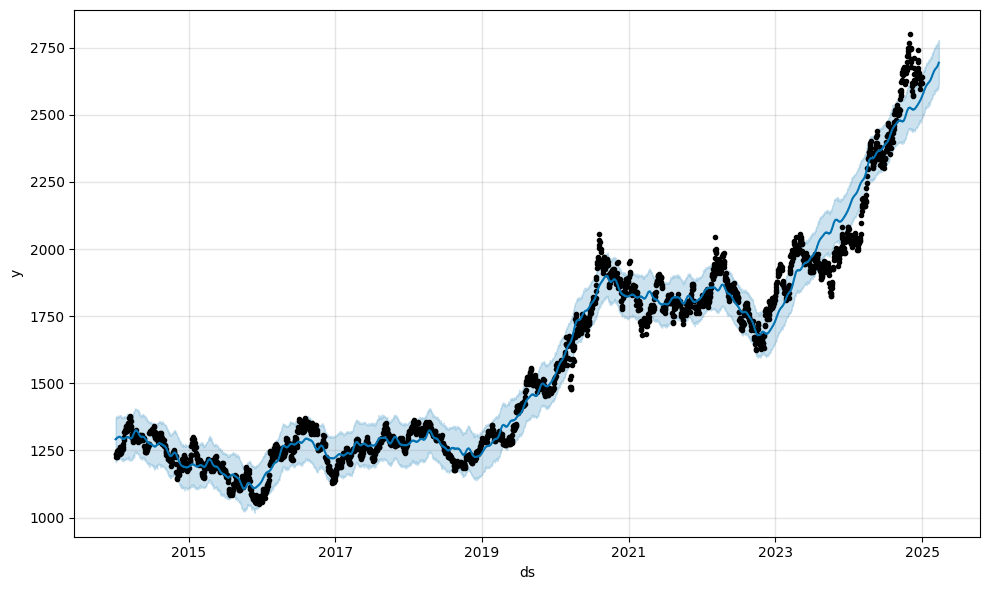

In [34]:
fig1 = modelo_prophet.plot(pronostico_prophet)
'''
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)

plot_plotly(modelo_prophet, pronostico_prophet)
'''
# modelo_prophet.plot_components(pronostico_prophet)

# **Métricas de error**

In [35]:
# Unir los valores reales con los valores ajustados
df_eval = df_prophet.set_index('ds').join(pronostico_prophet.set_index('ds')[['yhat']], how='inner')

In [36]:
# MSE
mse_prophet = mean_squared_error(df_eval['y'], df_eval['yhat'])
print(f"MSE:  {mse_prophet:.2f}")

MSE:  3864.48


In [37]:
# MAD
mad_prophet = mean_absolute_error(df_eval['y'], df_eval['yhat'])
print(f"MAD:  {mad_prophet:.2f}")

MAD:  45.44


In [38]:
# MAPE
mape_prophet = np.mean(np.abs((df_eval['y'] - df_eval['yhat']) / df_eval['y'])) * 100
print(f"MAPE: {mape_prophet:.2f}%")

MAPE: 2.77%


In [39]:
# Desviación estándar
desv_est_prophet = mad_prophet * 1.25
print(f"Desviación estandar: {desv_est_prophet:.2f}")

Desviación estandar: 56.80


# **Resumen de métricas de errores**

In [40]:
metodos = ['Winters', 'ARIMA', 'SARIMA', 'Prophet']
MSE = [mse_winters, mse_arima, mse_sarima, mse_prophet]
MAD = [mad_winters, mad_arima, mad_sarima, mad_prophet]
MAPE = [mape_winters, mape_arima, mad_sarima, mad_prophet]
Desv_Estandar = [desv_est_winters, desv_est_arima, desv_est_sarima, desv_est_prophet]

tabla_modelos = pd.DataFrame({
    'Método de pronóstico': metodos,
    'MSE': MSE,
    'MAD': MAD,
    'MAPE %': MAPE,
    'Desv. Estándar': Desv_Estandar
}
)

print(tabla_modelos)

  Método de pronóstico          MSE        MAD     MAPE %  Desv. Estándar
0              Winters   229.434013  10.822316   0.680797       13.527895
1                ARIMA   766.518894  10.929192   0.688110       13.661490
2               SARIMA   804.854573  11.052959  11.052959       13.816198
3              Prophet  3864.479092  45.440943  45.440943       56.801179
